# Student Performance Indicator

## Lifecycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose the best model

## 1) Problem Statement
- This project is done to understand how the students' performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation course

## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams 
- The data consists of 8 columns and 1000 rows

### 2.1) Import Data and Required Packages
importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [161]:
df = pd.read_csv('data/stud.csv')

### Show Top 5 Records

In [162]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [163]:
df.shape

(1000, 8)

### 2.2) Dataset information
- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks to Perform
- Check missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

### 3.1) Check Missing Values

In [164]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the dataset**

### 3.2) Check Duplicates

In [165]:
df.duplicated().sum()

0

**There are no duplicated rows in the dataset**

### 3.3) Check data types

In [166]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Checking the number of unique values of each column

In [167]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Check statistics of dataset

In [168]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
- From above description of numerical data, all means are very close to each other for each type of scores between 66 to 68;
- All standard deviations are also close which are between 14.6 to 15.19;
- While there is a minimum score of 0 in math, for writing minimum is much higher, score=10 and reading the has the highest minimum, score=17

### 3.6) Exploring Data

In [169]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [170]:
# define numerical & categorical columns
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f"We have {len(num_features)} numerical features: {num_features}")
print(f"We have {len(cat_features)} categorical features: {cat_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7) Adding columns for "Total Score" and "Average" (Feature Engineering)

In [171]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Count the number of students that get full marks for each course

In [172]:
math_full = df[df['math_score'] == 100]['gender'].count()
read_full = df[df['reading_score'] == 100]['gender'].count()
write_full = df[df['writing_score'] == 100]['gender'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Reading: {read_full}')
print(f'Number of students with full marks in Writing: {write_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


#### Count the number of students that get less than or equal to 20 for each course

In [173]:
math_less_20 = df[df['math_score'] <= 20]['gender'].count()
read_less_20 = df[df['reading_score'] <= 20]['gender'].count()
write_less_20 = df[df['writing_score'] <= 20]['gender'].count()

print(f'Number of students with less than 20 marks in Math: {math_less_20}')
print(f'Number of students with less than 20 marks in Reading: {read_less_20}')
print(f'Number of students with less than 20 marks in Writing: {write_less_20}')

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


### Insights
- From the above values we get that most students performed the worst in Maths
- Best performance is in reading course

## 4) Exploring Data (Visualization)

### 4.1) Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

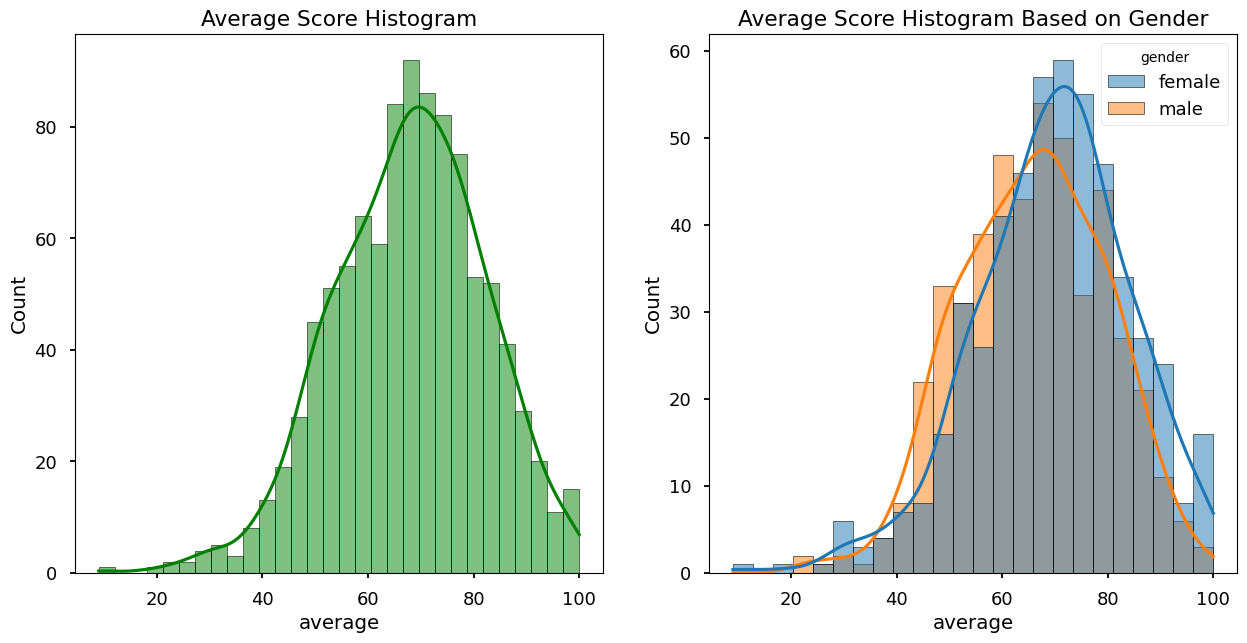

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title("Average Score Histogram")
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title("Average Score Histogram Based on Gender")
plt.show()

### Insights
- We can see that female students perform better than male

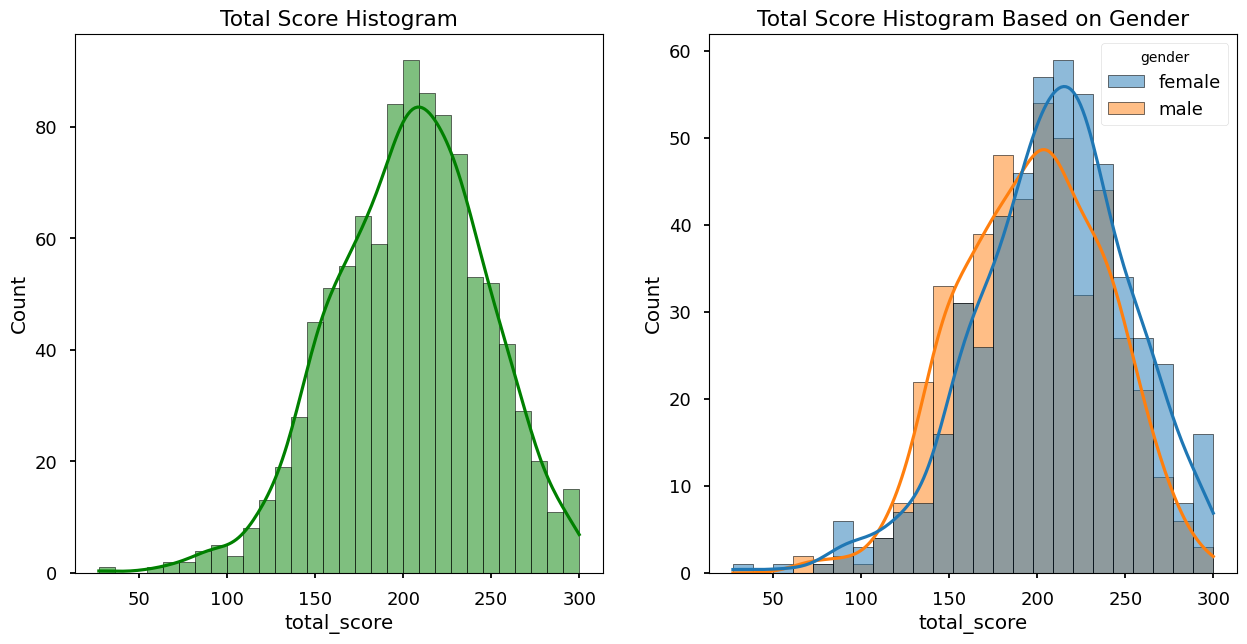

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.title("Total Score Histogram")
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.title("Total Score Histogram Based on Gender")
plt.show()

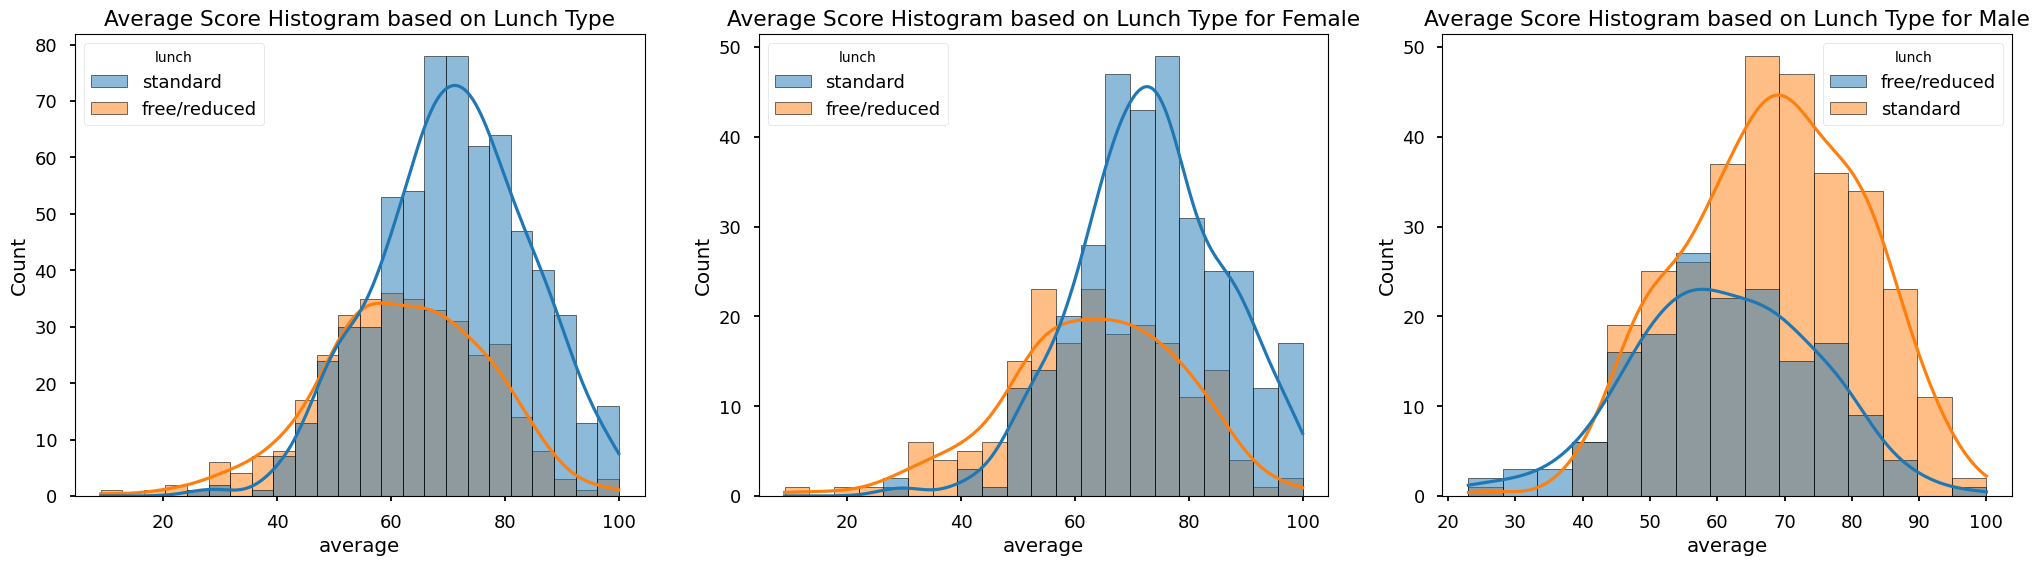

In [176]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title("Average Score Histogram based on Lunch Type")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title("Average Score Histogram based on Lunch Type for Female")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title("Average Score Histogram based on Lunch Type for Male")
plt.show()

### Insights
- Standard lunch helps students to perform better in exams
- Standard lunch helps students to perform better in exams regardless of gender

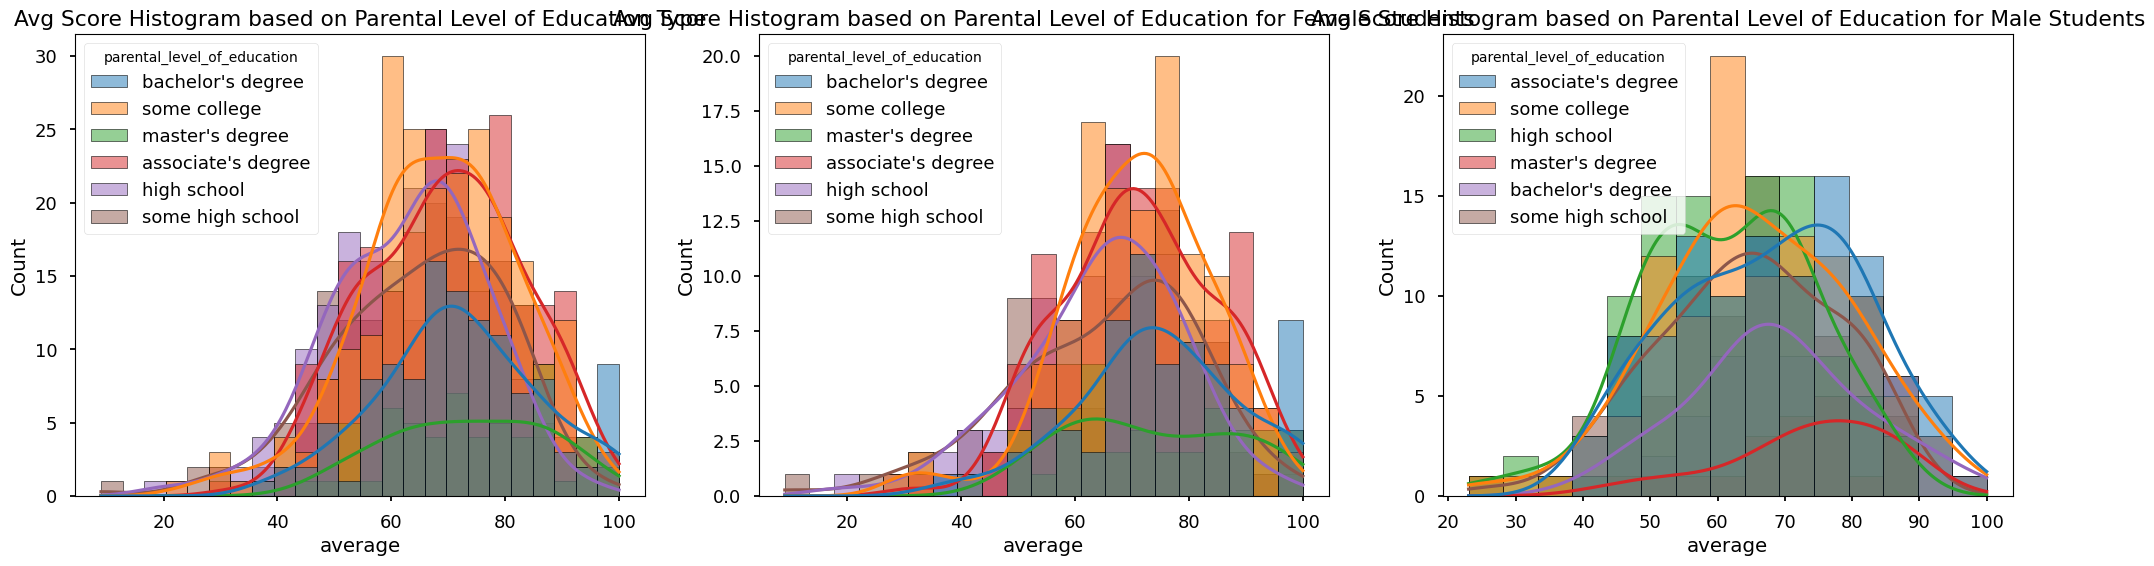

In [177]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("Avg Score Histogram based on Parental Level of Education Type")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Avg Score Histogram based on Parental Level of Education for Female Students")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Avg Score Histogram based on Parental Level of Education for Male Students")
plt.show()

### Insights
- In general, parent's education don't really shows any substantial effect in helping the students to perform well in exams
- We can see that in 2nd plot, female students where parents are with associate degree and bachelor's degree perform better in exams.
- No substantial affect in parent education levels for male students.

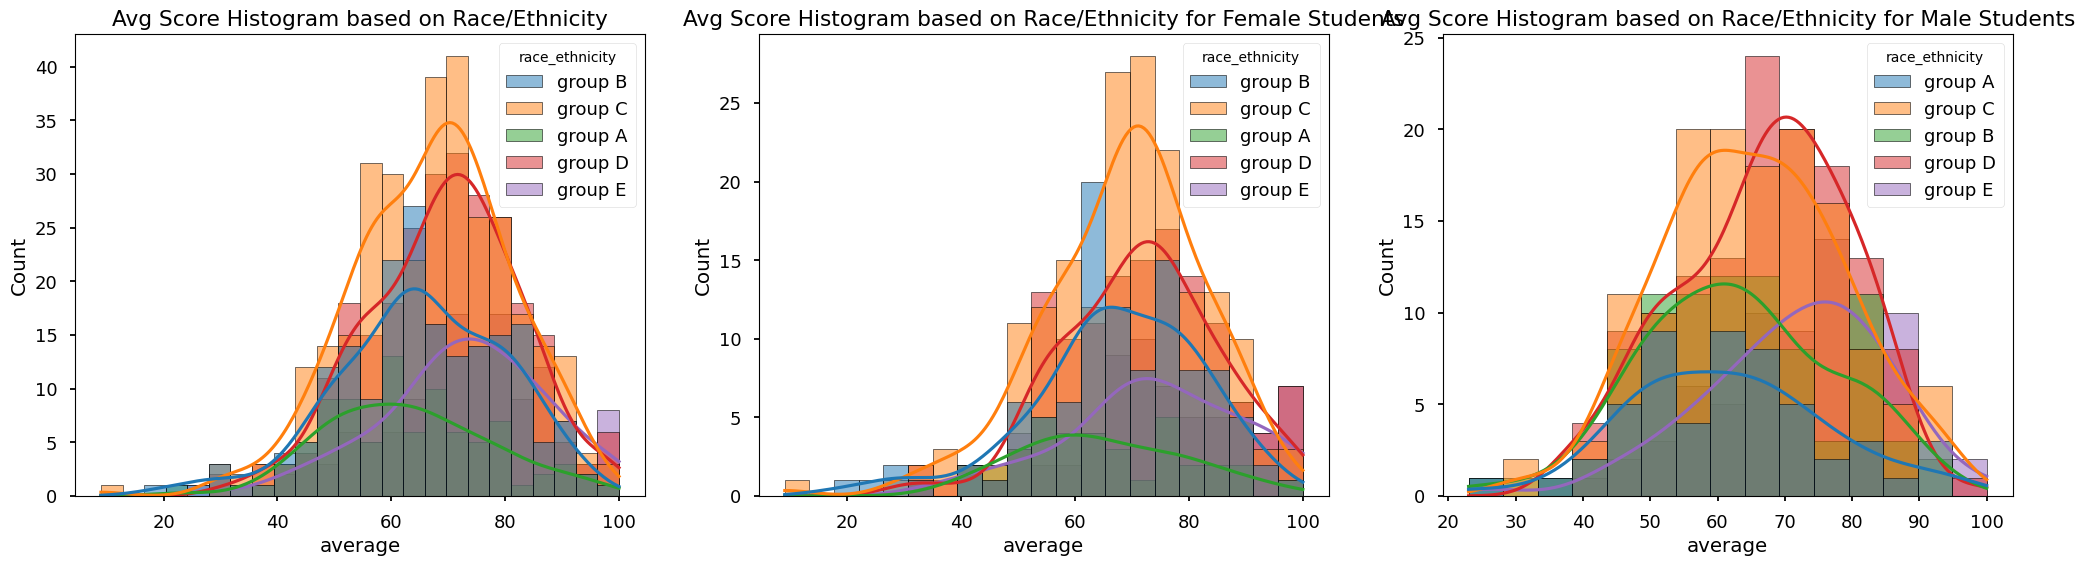

In [178]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title("Avg Score Histogram based on Race/Ethnicity")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.title("Avg Score Histogram based on Race/Ethnicity for Female Students")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.title("Avg Score Histogram based on Race/Ethnicity for Male Students")
plt.show()

### Insights
- Students from Group A and B performed less in exams
- Regardless of the gender, still Group A and B performed less in exams.

In [179]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

### 4.2) Maximum score of students in all three subjects

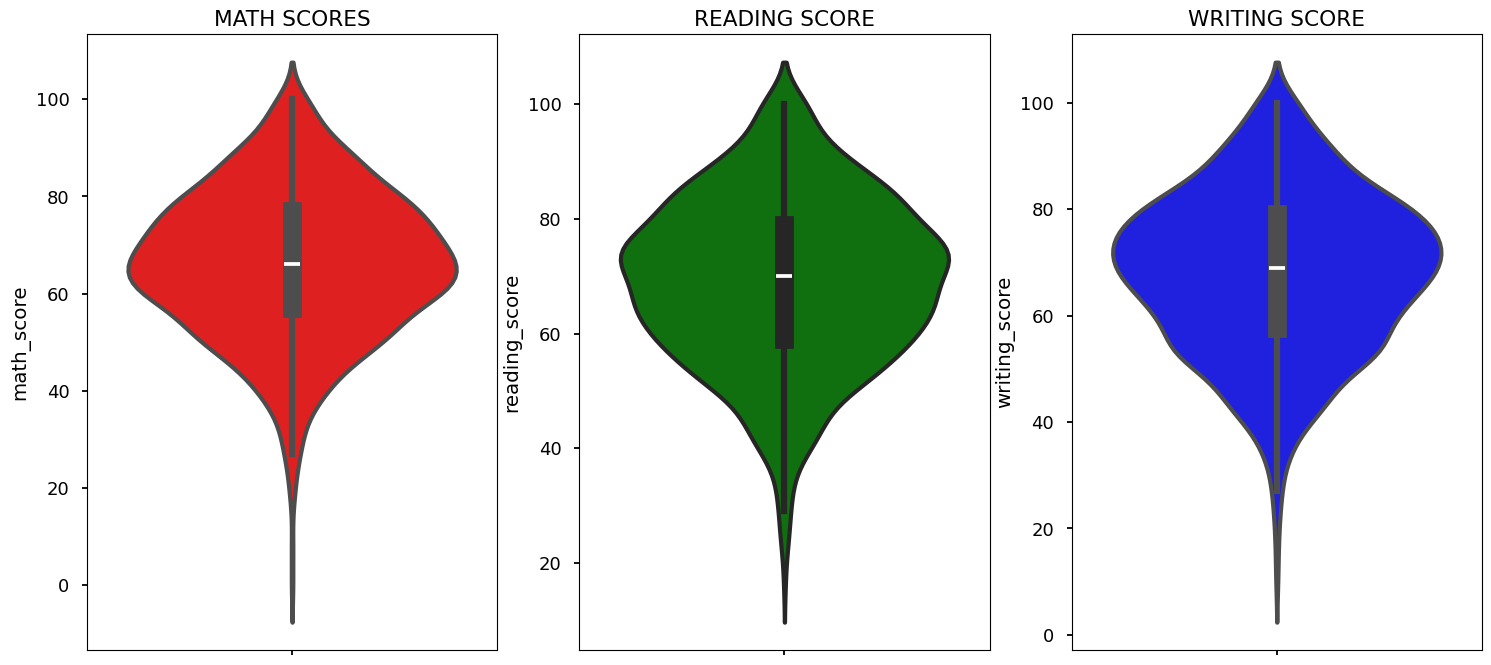

In [180]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title("MATH SCORES")
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(132)
plt.title('READING SCORE')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

### Insights
- From the violinplots, we can see that most of the student scores:
    - in between 60-80 in maths
    - in between 55-85 in reading
    - in between 55-85 in writing

### 4.3) Multivariate analysis using pieplot

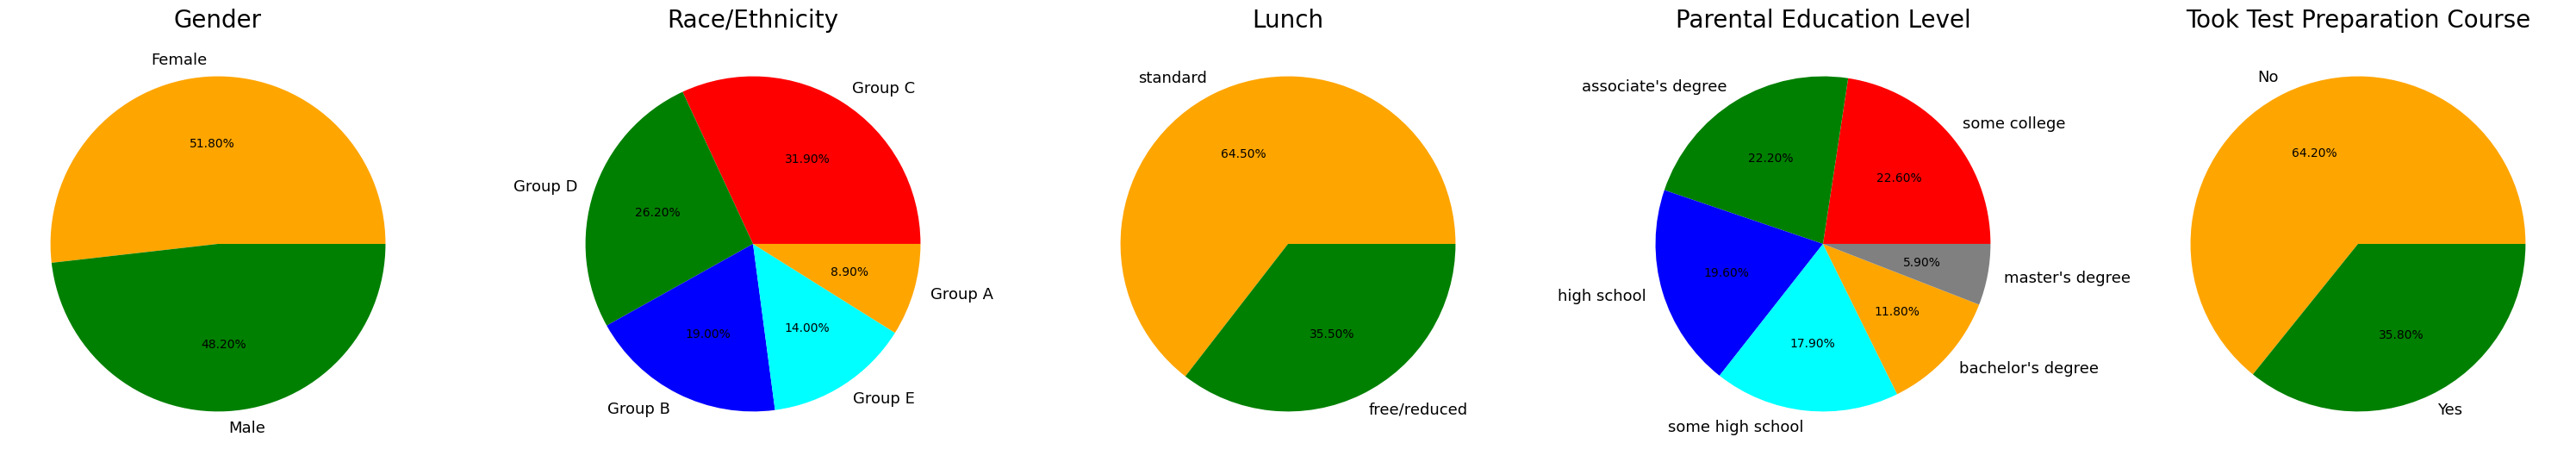

In [181]:
plt.rcParams['figure.figsize'] = (30,12)

# Gender
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['orange', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity
plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch
plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['orange', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Parental Level Of Education
plt.subplot(154)
size = df['parental_level_of_education'].value_counts()
labels = 'some college',"associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree" 
color = ['red', 'green', 'blue', 'cyan','orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education Level', fontsize=20)
plt.axis('off')

# Test Preparation Course
plt.subplot(155)
size = df['test_preparation_course'].value_counts()
labels = 'No', 'Yes'
color = ['orange', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Took Test Preparation Course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

### Insights
- Balanced students gender in the class;
- Biggest ehtnicity group is C;
- Most students have standard lunch before the test;
- Students that have parents education level is "Some College" is the most followed closely by "Associate's Degree";
- Most of the students did not take the test preparation course.

## 4.4) Feature Wise Visualization
Initializing some useful functions for plotting our univariate and bivariate analysis

In [206]:
## For univariate analysis
def plot_category_distribution(df, column, explode_index=1, palette_name='bright', x_rotation=0):
    """
    Plots a bar chart and pie chart for a categorical column with consistent coloring.

    Parameters:
    - df: pandas DataFrame
    - column: str — name of the categorical column
    - explode_index: int — index of the group to explode in the pie chart (default=1)
    - palette_name: str — seaborn palette to use (default='bright')
    """
    # Step 1: Get sorted unique categories by count
    groups = df[column].value_counts().index.tolist()
    
    # Step 2: Define a consistent color map
    colors = sns.color_palette(palette_name, len(groups))
    group_color_map = dict(zip(groups, colors))
    
    # Step 3: Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    # Bar plot
    sns.countplot(x=column, data=df, palette=group_color_map, ax=ax[0], saturation=0.95)
    for container in ax[0].containers:
        ax[0].bar_label(container, color='black', size=10)
    ax[0].set_title(f"{column.replace('_', ' ').title()} Group Counts")
    ax[0].set_xlabel(column.replace('_', ' ').title())
    ax[0].tick_params(axis='x', rotation=x_rotation)
    ax[0].set_ylabel("Count")

    # Pie chart
    counts = df[column].value_counts()
    explode = [0.1 if i == explode_index else 0 for i in range(len(groups))]
    pie_colors = [group_color_map[group] for group in counts.index]
    ax[1].pie(x=counts, labels=counts.index, explode=explode, autopct='%1.1f%%', shadow=True, colors=pie_colors)
    ax[1].set_title(f"{column.replace('_', ' ').title()} Pie Chart")

    plt.tight_layout()
    plt.show()   

def plot_group_scores(score_dict, group_name, ylabel, pallete=['mako', 'flare','coolwarm'], x_rotation=0):
    """
    Plots side-by-side barplots for multiple score types (e.g. math, reading, writing) by group.

    Parameters:
    - score_dict: dict — keys are score types (e.g., 'math_score'), values are Series or arrays (grouped means)
    - group_name: str — name of the categorical column or grouping (for axis labeling)
    - ylabel: str — y-axis label for all subplots
    """
    num_scores = len(score_dict)
    fig, ax = plt.subplots(1, num_scores, figsize=(7 * num_scores, 8))
    
    if num_scores == 1:
        ax = [ax]  # Ensure ax is iterable

    for i, (score_name, values) in enumerate(score_dict.items()):
        palette = sns.color_palette(pallete[i])
        sns.barplot(x=values.index, y=values.values, ax=ax[i], palette=palette)
        ax[i].set_title(score_name.replace('_', ' ').title(), size=20)
        ax[i].set_ylabel(ylabel)
        ax[i].set_xlabel(group_name.replace('_', ' ').title())
        ax[i].tick_params(axis='x', rotation=x_rotation)
        for container in ax[i].containers:
            ax[i].bar_label(container, color='black', size=10, fmt='%.2f')
    
    plt.tight_layout()
    plt.show()



### 4.4.1) GENDER Column
- How is the distribution of Gender?
- Is gender has any impact on student's performance

### Univariate Analysis - Distribution of Gender

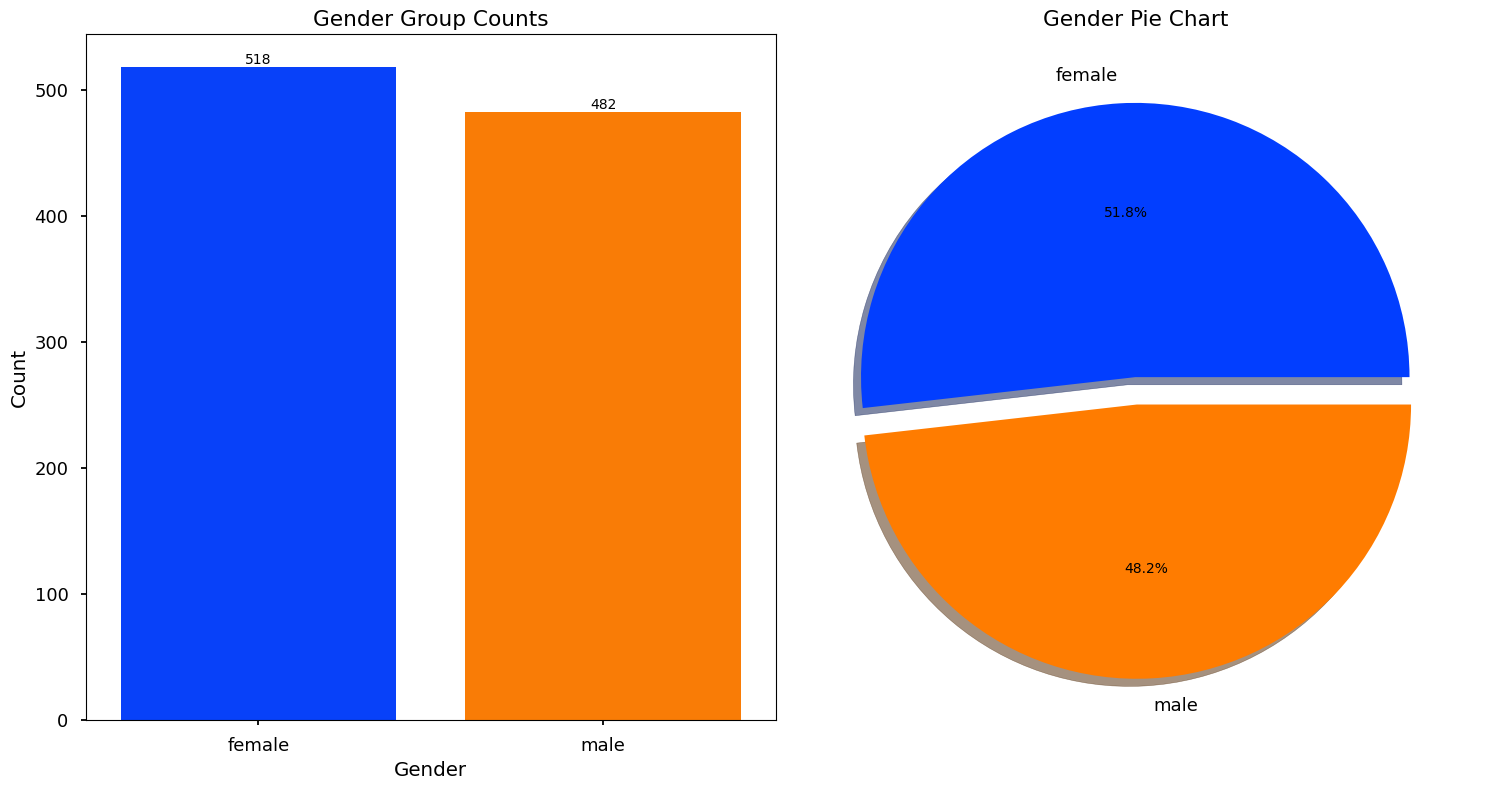

In [183]:
plot_category_distribution(df, 'gender')

### Insights
- Gender has a balanced datasets where female is 51.8% (518) of the datasets while 48.2% (482) is male.

### Bivariate Analysis - Impact of Gender on Student's Performance

In [184]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


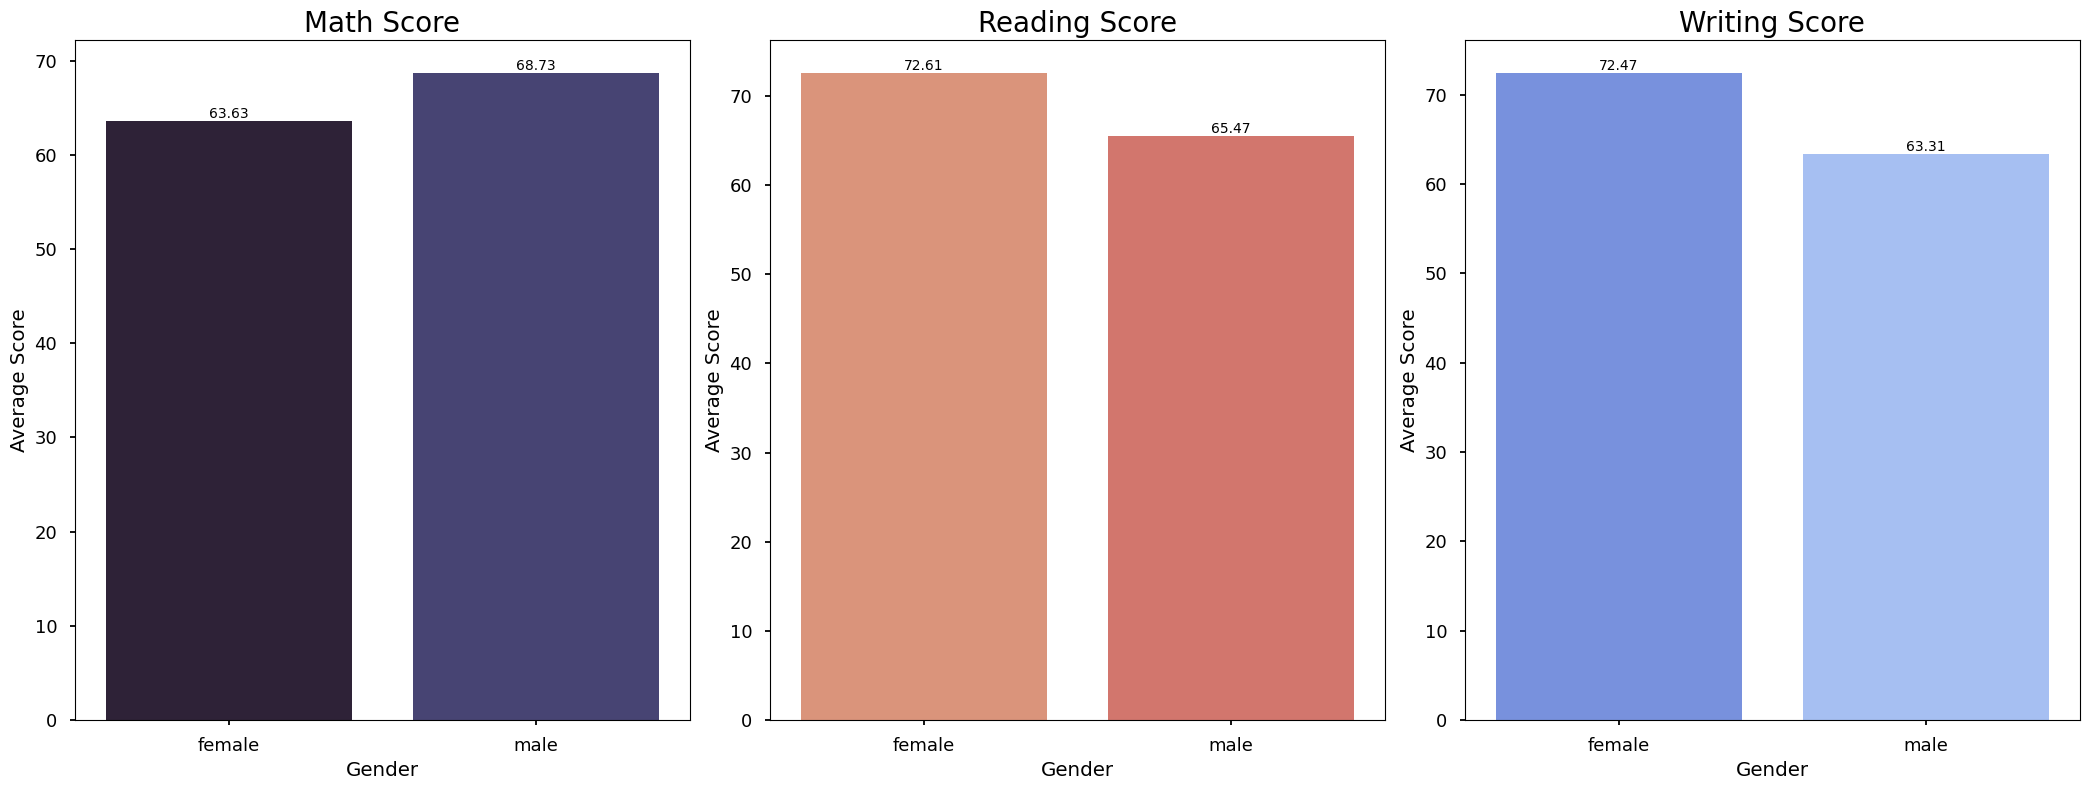

In [185]:
score_means = {
    'math_score': gender_group['math_score'],
    'reading_score': gender_group['reading_score'],
    'writing_score': gender_group['writing_score']
}

plot_group_scores(score_means, 'Gender', 'Average Score', ['mako', 'flare','coolwarm'])

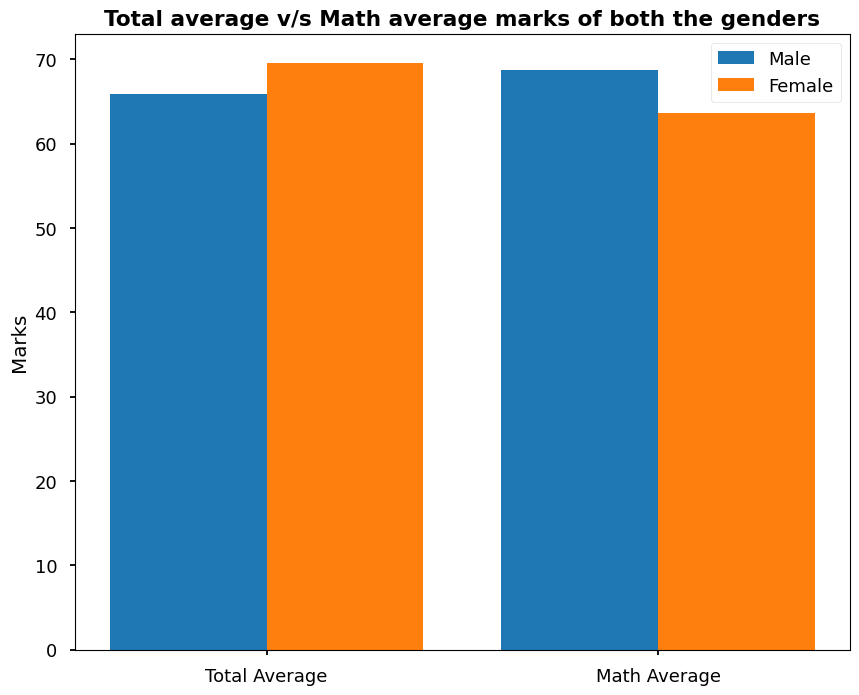

In [186]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights
- On average females have a better overall score than male students
- However male students scored higher on average in Maths

### 4.4.2) RACE/ETHNICITY Column

### Univariate Analysis - Distribution of Race/Ethnicity

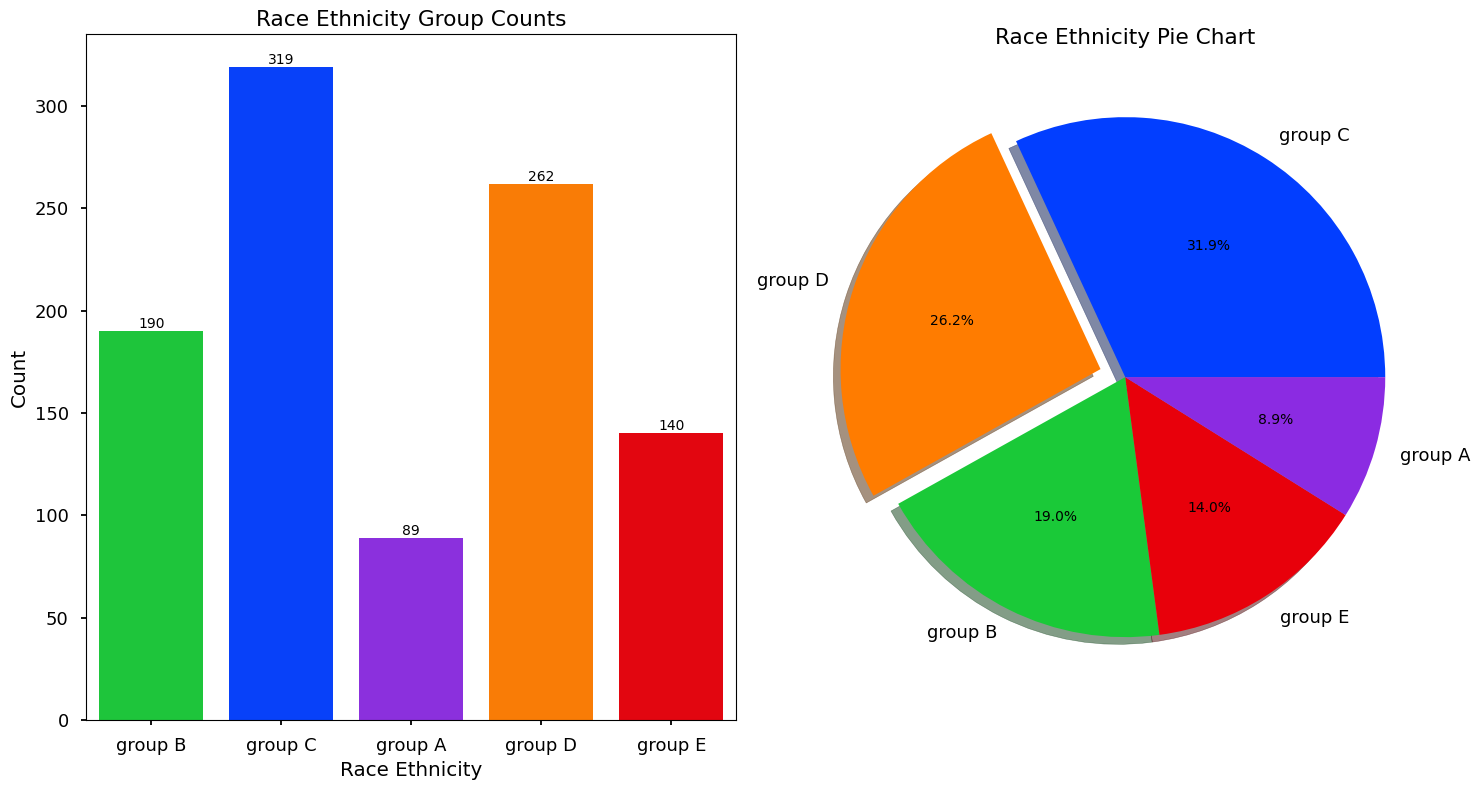

In [187]:
plot_category_distribution(df, 'race_ethnicity')

### Insights
- Most of the students belong to Group C/Group D
- Lowest number of students belong to Group A

### Bivariate Analysis - Impact of Race/Ethnicity on Student's Performance

In [188]:
race_ethnicity_group = df.groupby('race_ethnicity')[df.select_dtypes(include='number').columns].mean()
race_ethnicity_group

,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


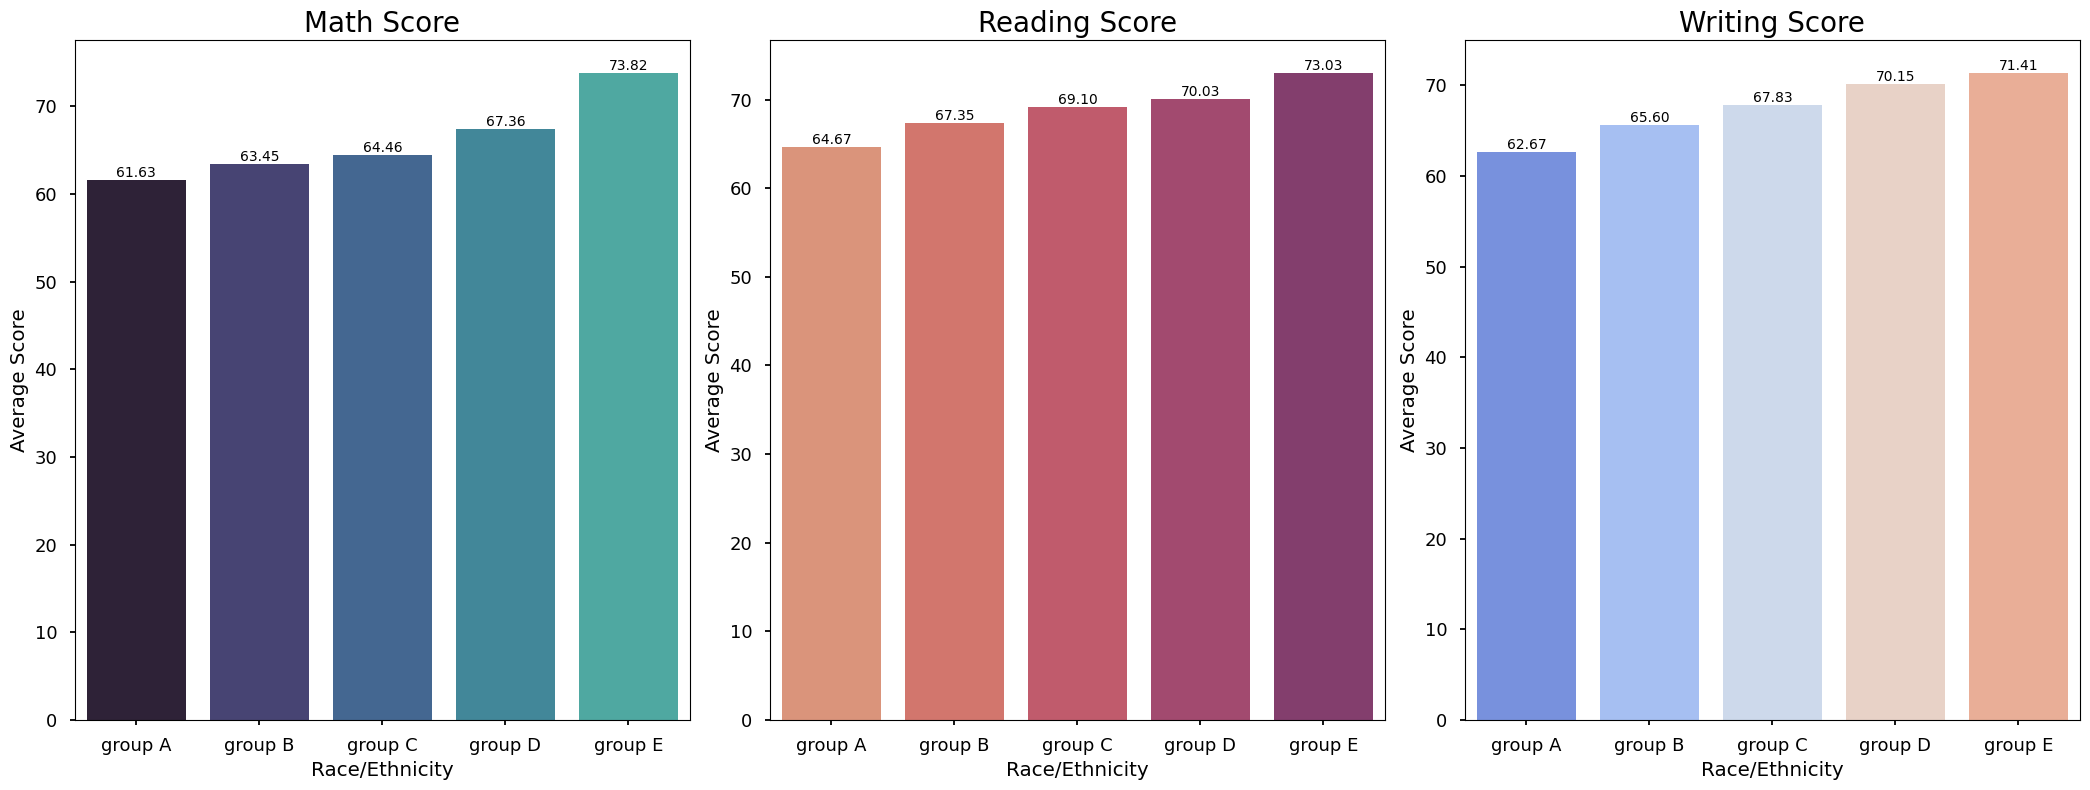

In [189]:
score_means = {
    'math_score': race_ethnicity_group['math_score'],
    'reading_score': race_ethnicity_group['reading_score'],
    'writing_score': race_ethnicity_group['writing_score'],
}

plot_group_scores(score_means, 'Race/Ethnicity', 'Average Score', ['mako', 'flare','coolwarm'])

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.

### 4.4.3) LUNCH Column

### Univariate Analysis - Distribution of Lunch

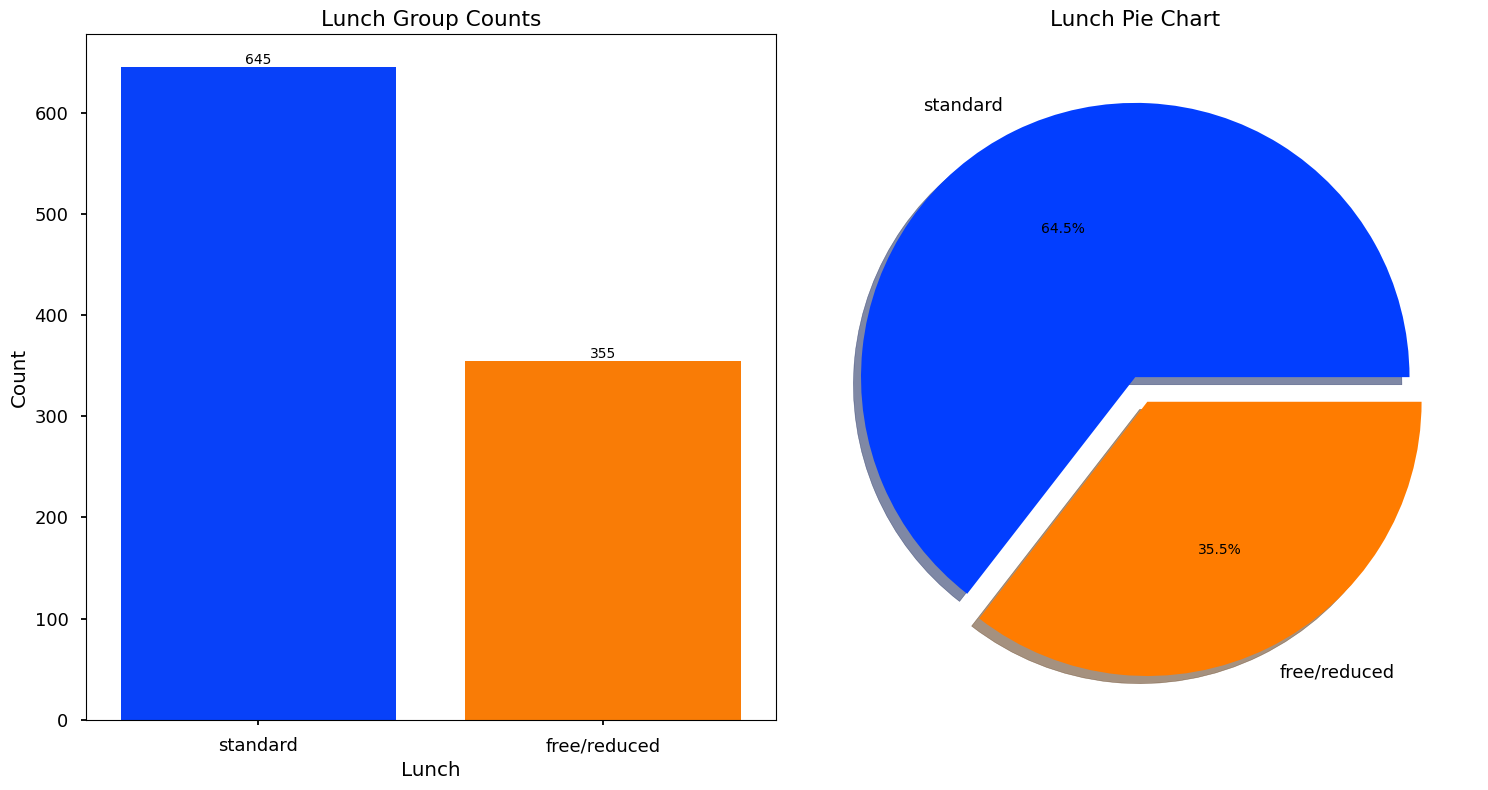

In [191]:
plot_category_distribution(df, 'lunch')

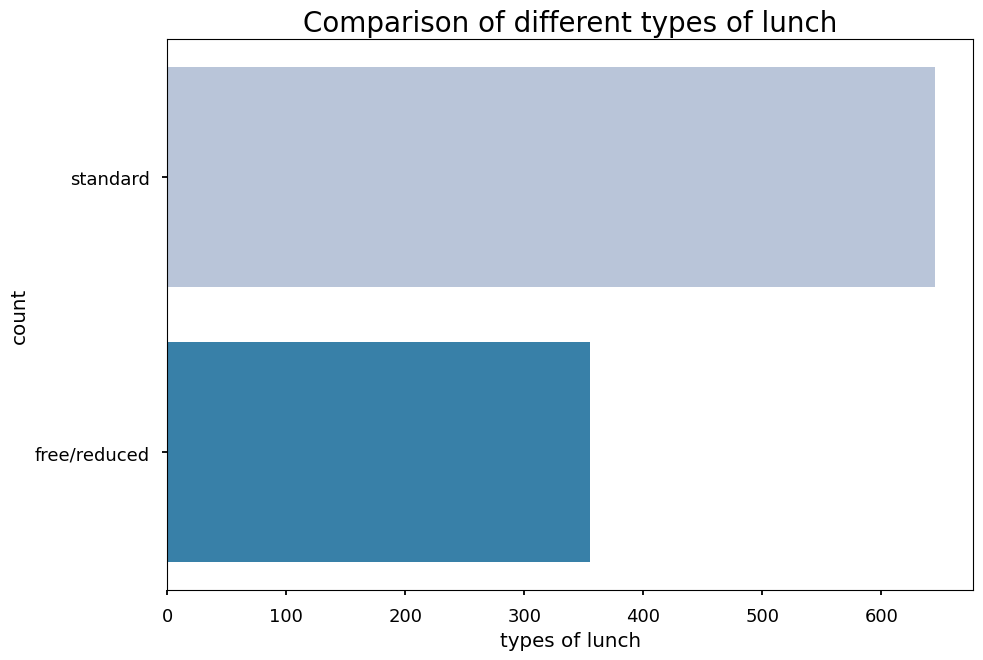

In [192]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights
- More students are being served a Standard lunch compared to free/reduced lunch

### Bivariate Analysis - Impact of Lunch on Student's Performance

In [193]:
lunch_group = df.groupby('lunch')[df.select_dtypes(include='number').columns].mean()

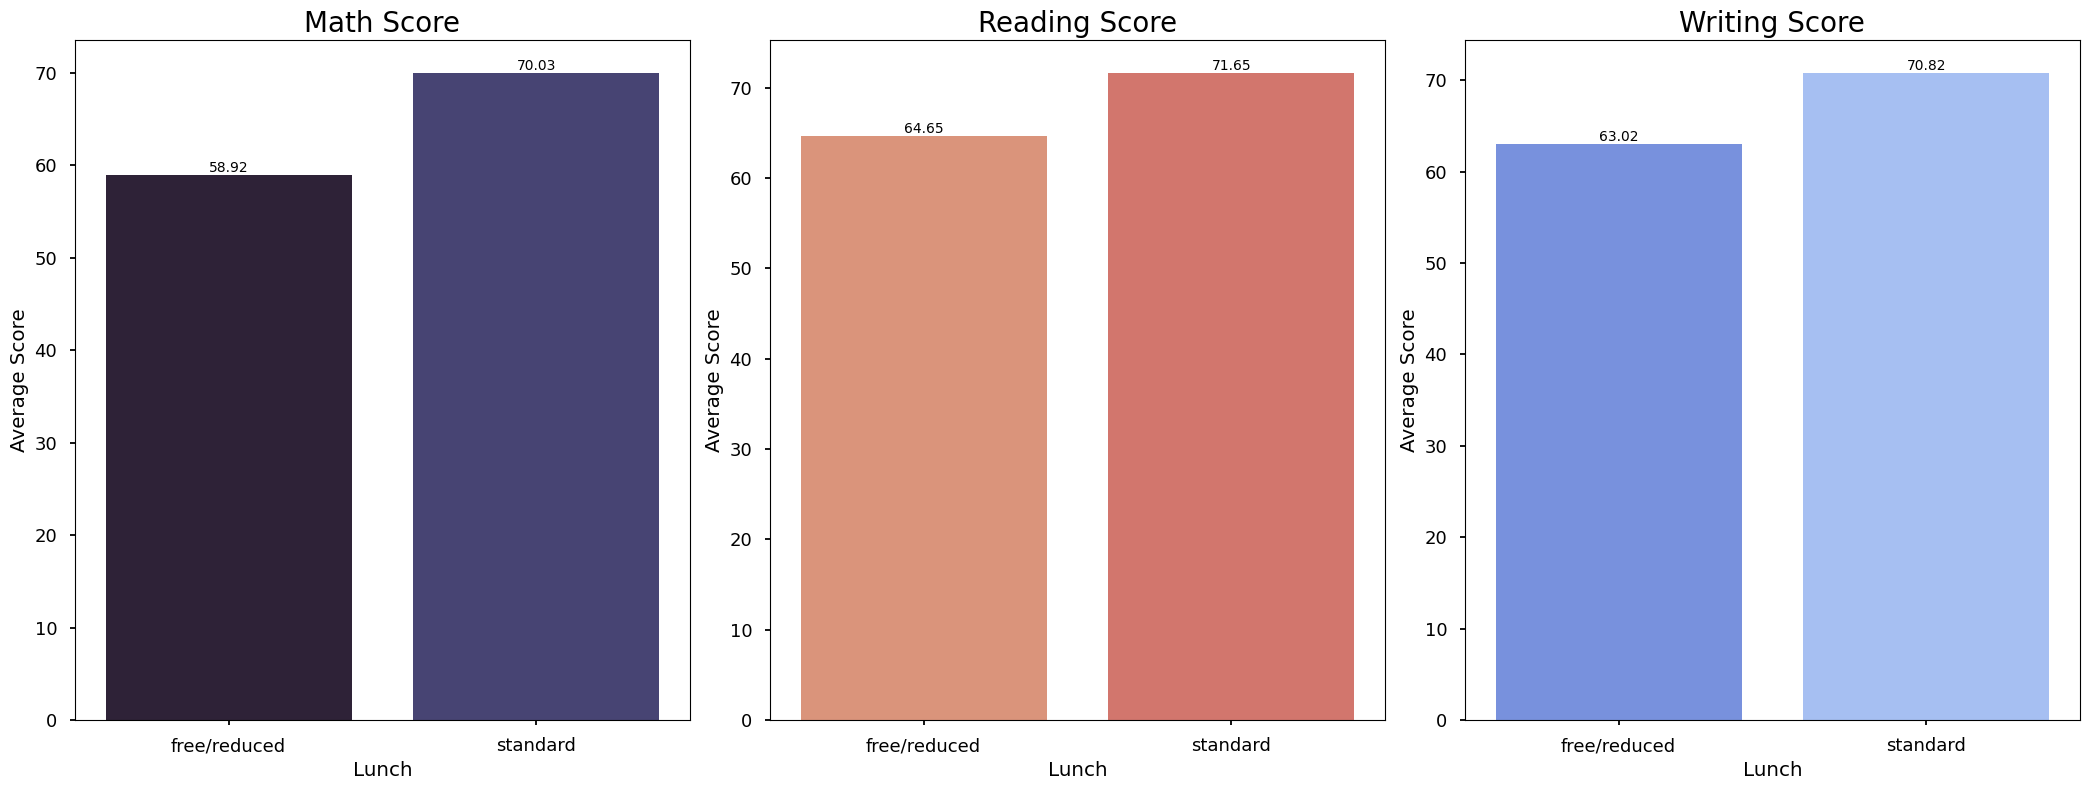

In [194]:
score_means = {
    'math_score': lunch_group['math_score'],
    'reading_score': lunch_group['reading_score'],
    'writing_score': lunch_group['writing_score'],
}

plot_group_scores(score_means, 'Lunch', 'Average Score')

### Insights
- Students who get Standard Lunch tend to perform better than those who get free/reduced lunch

### 4.4.4) PARENTS' EDUCATION LEVEL Column

### Univariate Analysis - Distribution of Parents' Education Level

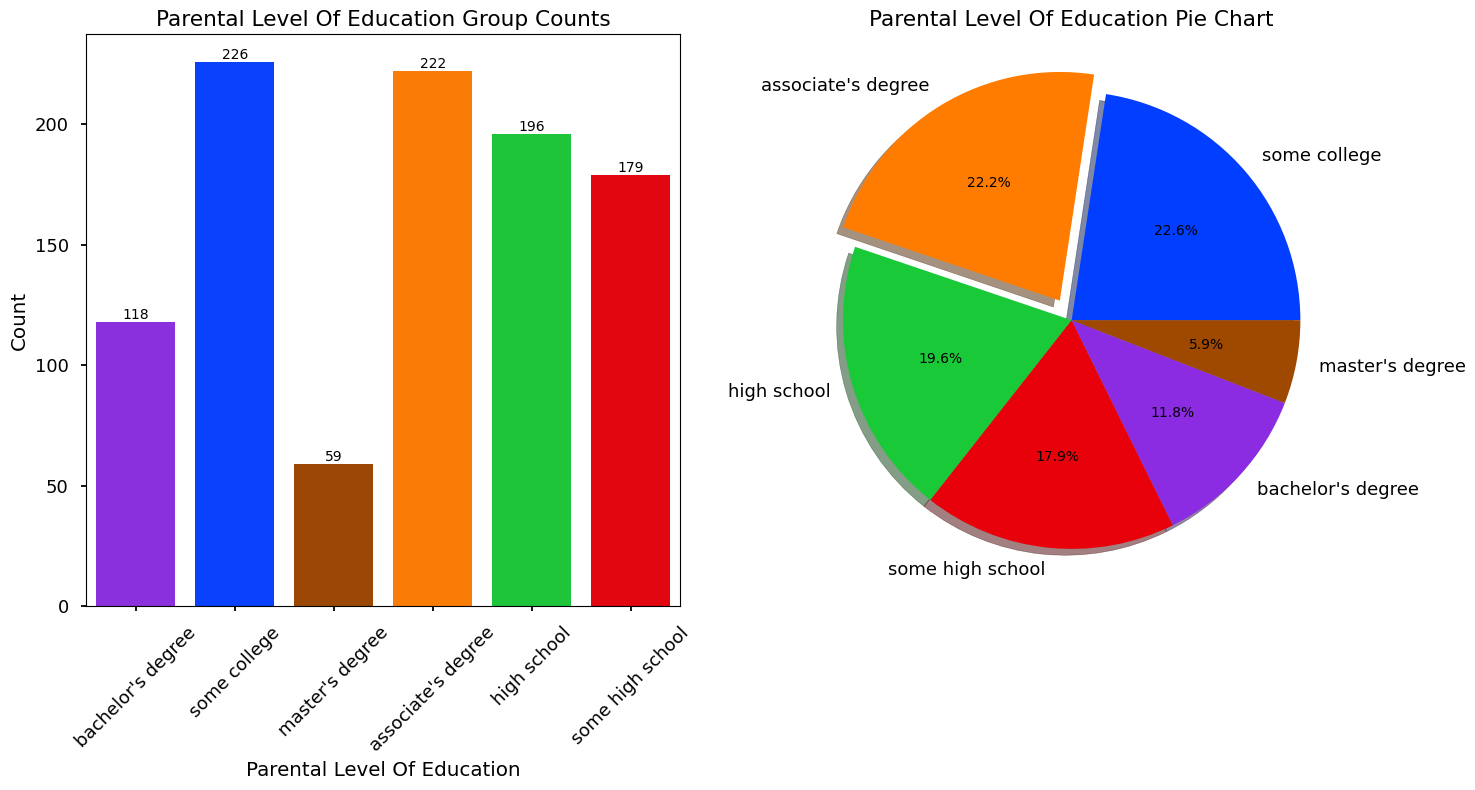

In [197]:
plot_category_distribution(df, 'parental_level_of_education', x_rotation=45)

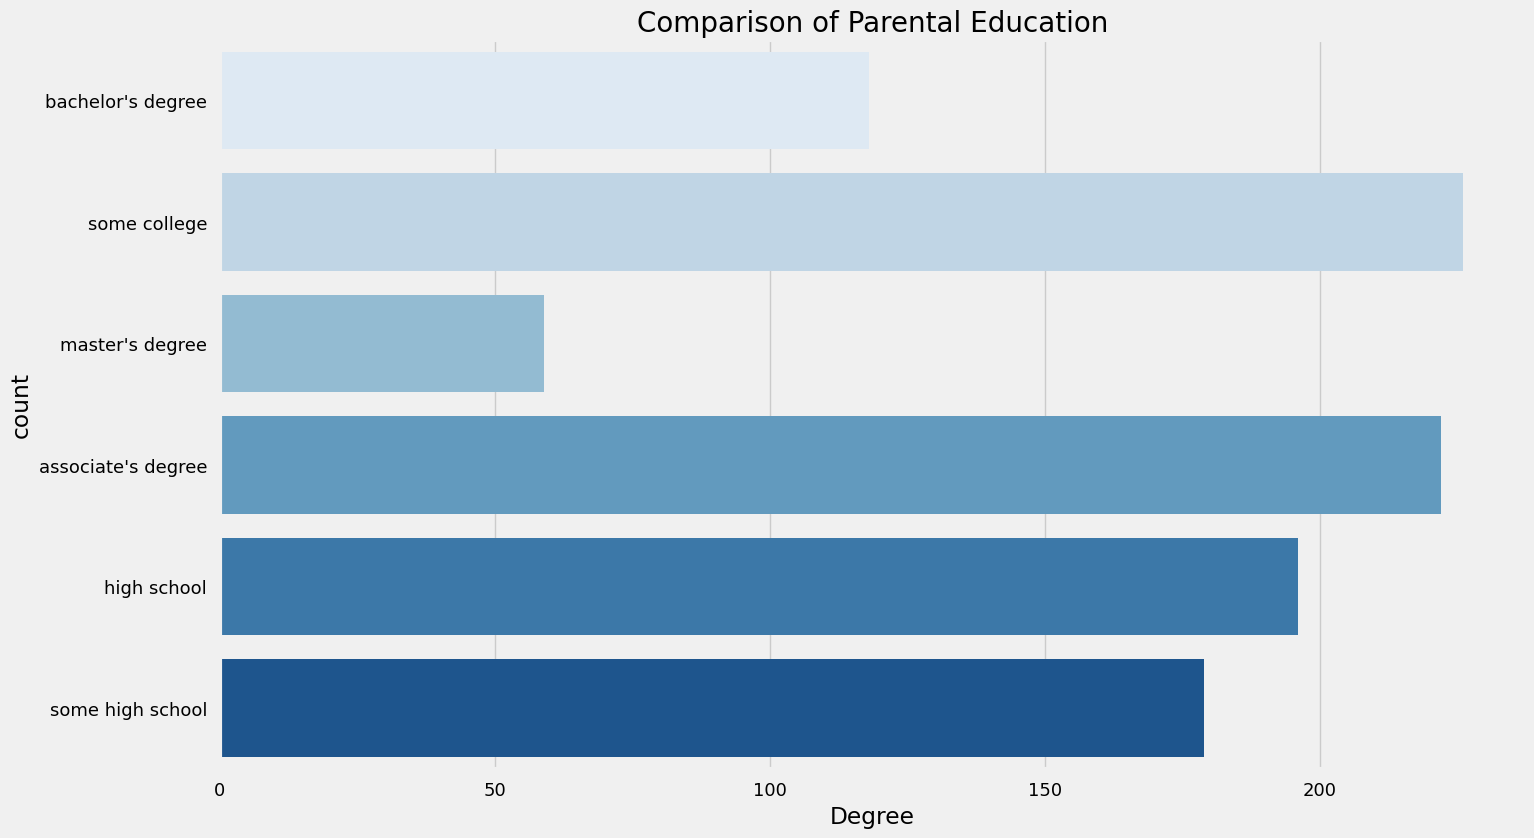

In [199]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights
- Largest number of parents are from some college

### Bivariate Analysis - Impact of Parents' Education Level on Student's Performance

In [202]:
parent_group = df.groupby('parental_level_of_education')[df.select_dtypes(include='number').columns].mean()
parent_group

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


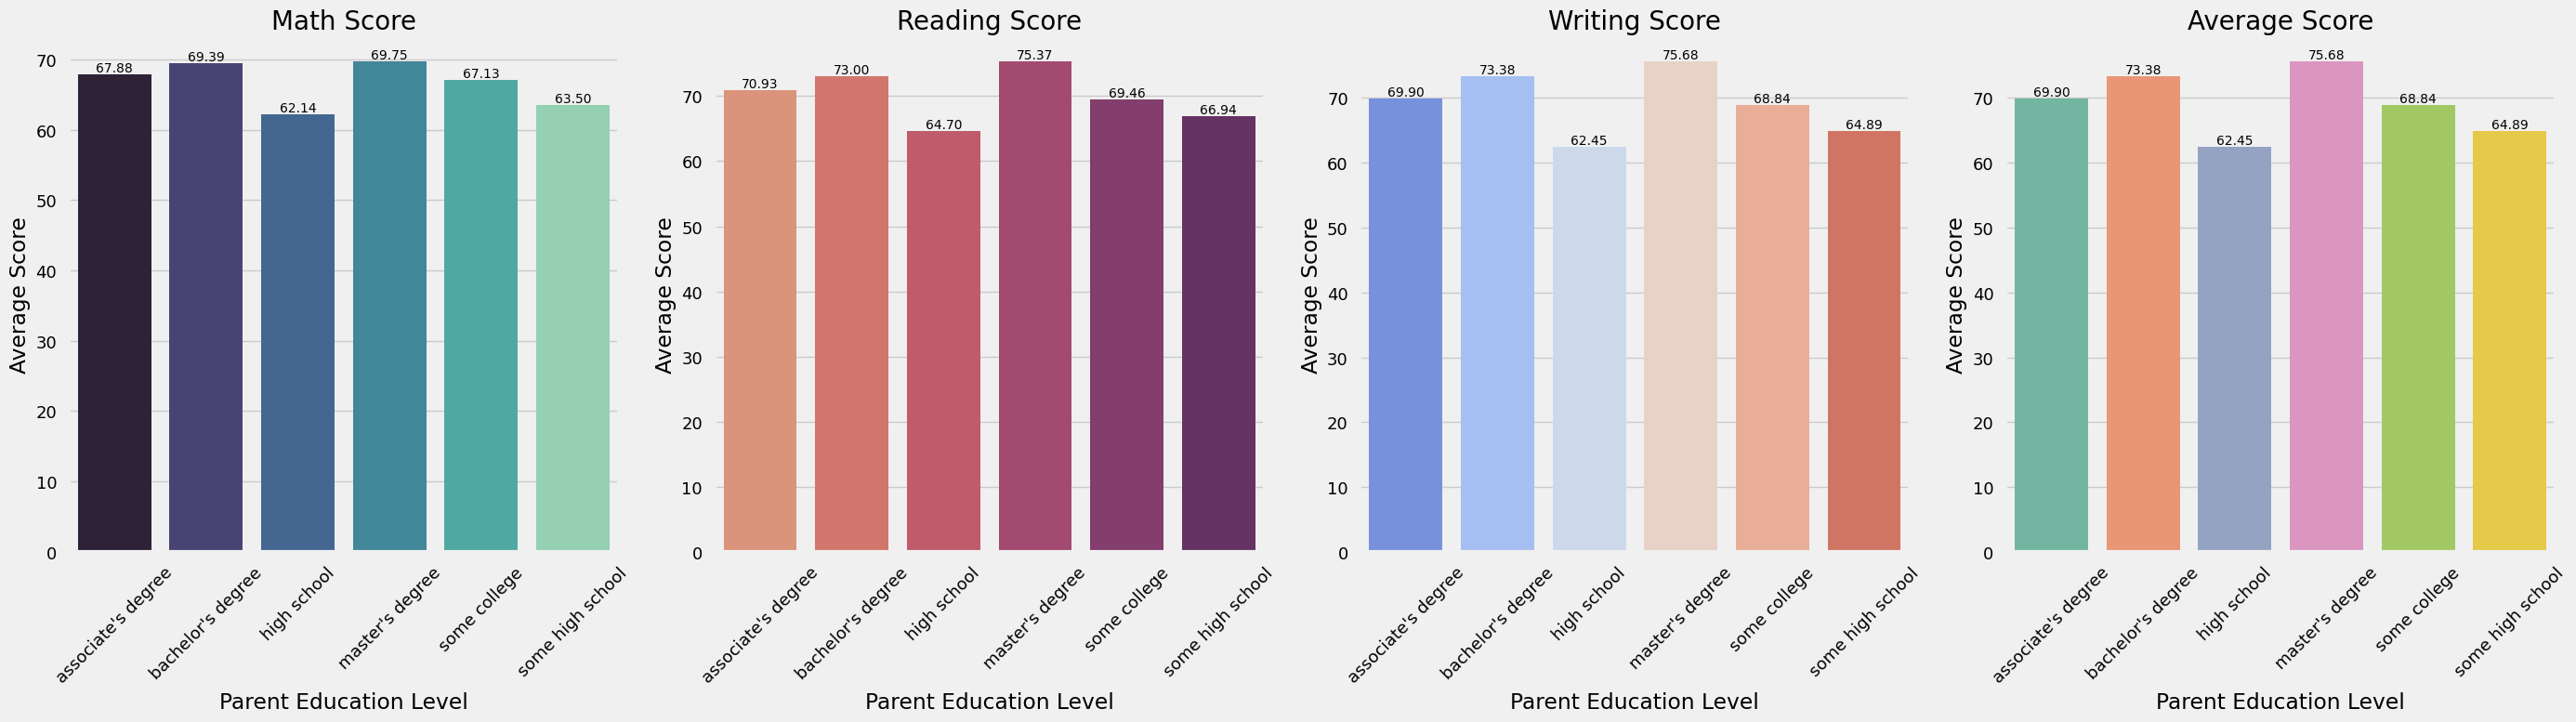

In [208]:
score_means = {
    'math_score': parent_group['math_score'],
    'reading_score': parent_group['reading_score'],
    'writing_score': parent_group['writing_score'],
    'average_score': parent_group['writing_score'],
}

plot_group_scores(score_means, 'Parent Education Level', 'Average Score', x_rotation=45, pallete=['mako', 'flare', 'coolwarm', 'Set2'])

### Insights
- Students which Parents' Education Level of master's degree, and bachelor's degree has higher average scores than others.

### 4.4.5) TEST PREPARATION COURSE Column

### Univariate Analysis - Distribution of Test Preparation Course

In [195]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

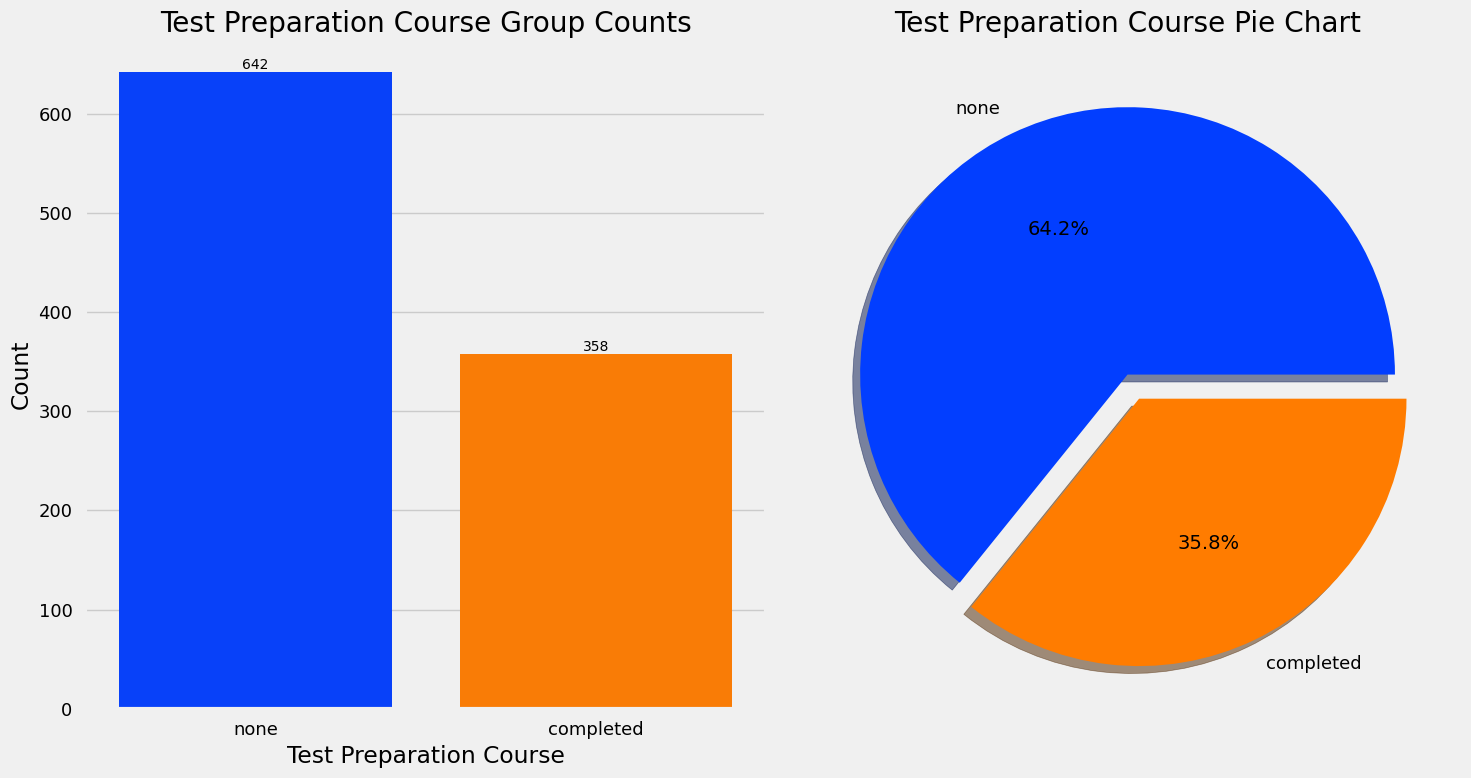

In [209]:
plot_category_distribution(df, 'test_preparation_course')

### Insights
- Less students completed the test preparation course

### Bivariate Analysis - Impact of Test Preparation Course on Student's Performance

In [213]:
test_group = df.groupby('test_preparation_course')[df.select_dtypes(include='number').columns].mean()
test_group

,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


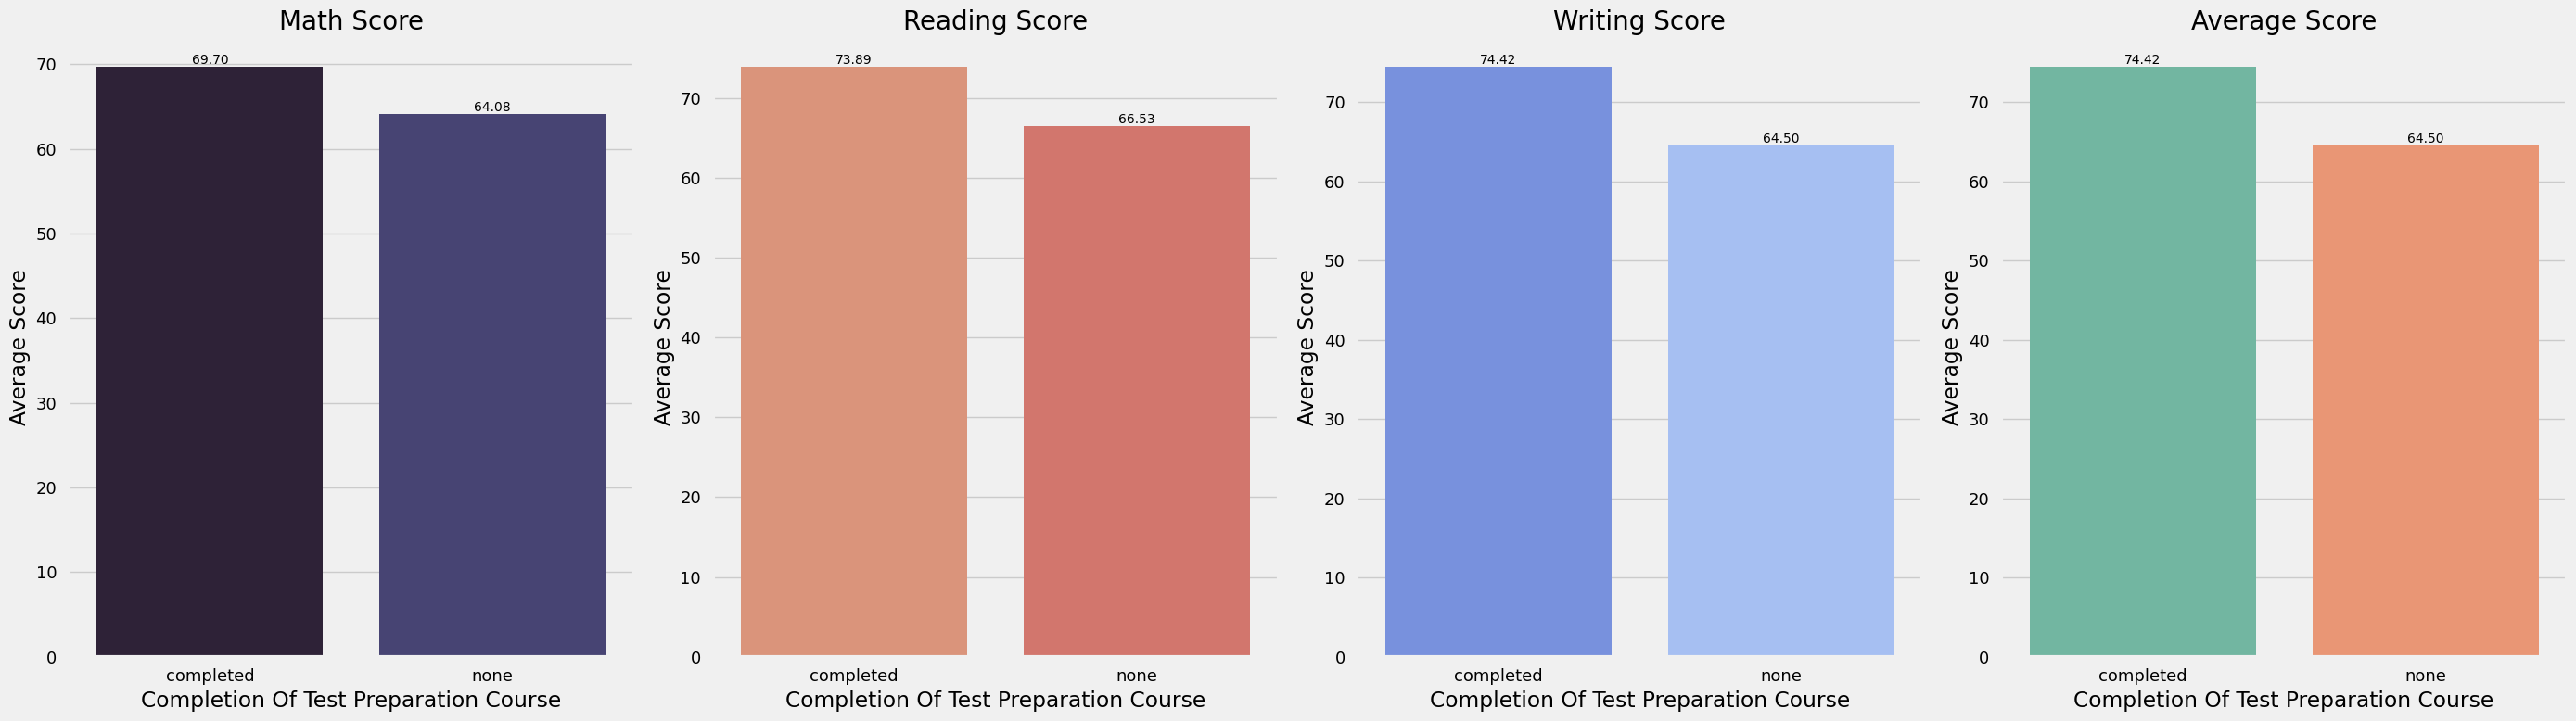

In [216]:
score_means = {
    'math_score': test_group['math_score'],
    'reading_score': test_group['reading_score'],
    'writing_score': test_group['writing_score'],
    'average_score': test_group['writing_score'],
}

plot_group_scores(score_means, 'Completion of Test Preparation Course', 'Average Score', pallete=['mako', 'flare', 'coolwarm', 'Set2'])

### Insights
- Students who completed the Test Preparation Course have scored higher in all tests compared to the one who didn't

#### 4.4.6 CHECKING OUTLIERS

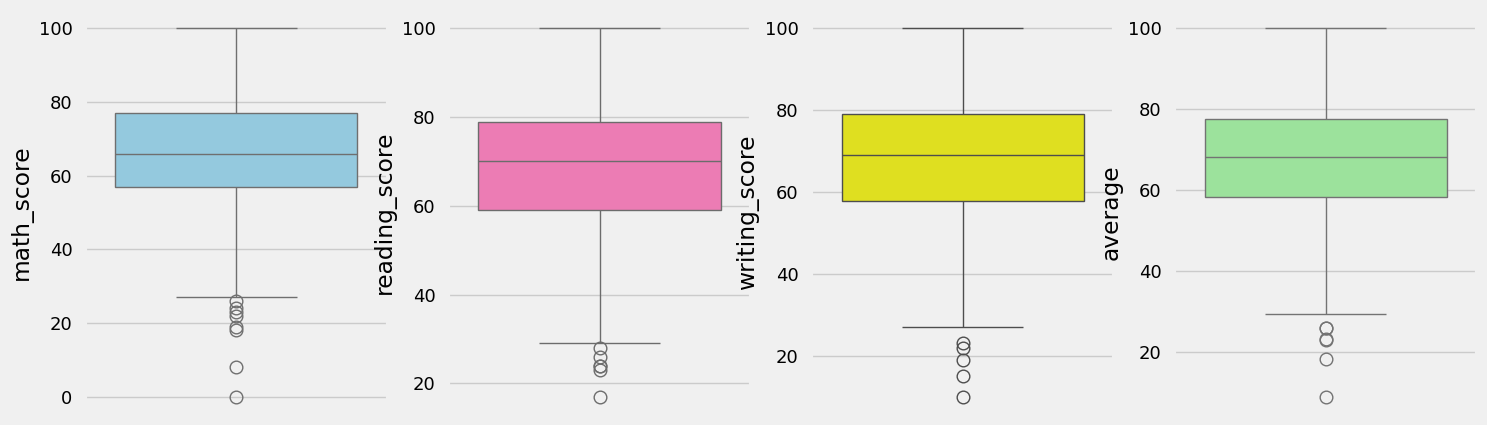

In [218]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

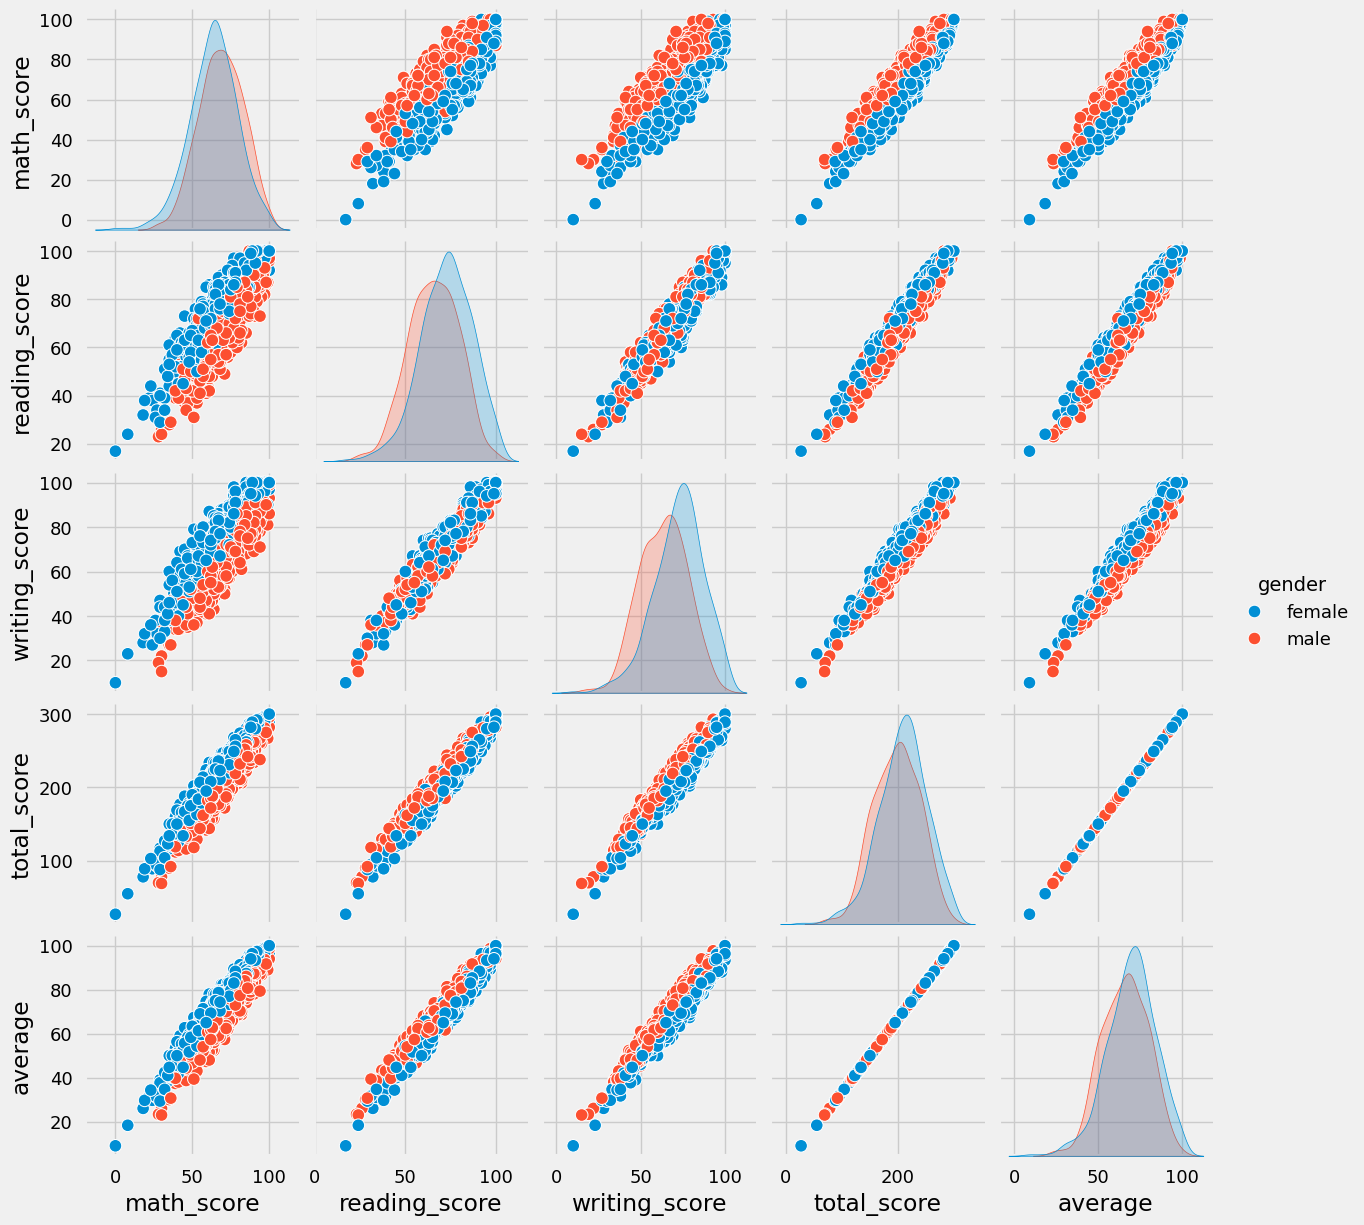

In [219]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.
### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education, test preparation course
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is benefitial.